In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2

C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
directory="dataset/train/"
classses=os.listdir(directory)

In [3]:
import os
import cv2
image_size=224
data1=[]#empty list
for category in classses:
    path = os.path.join(directory, category)
    print(path)
    label = classses.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr = cv2.imread(img_path)#Reading Images
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
        data1.append([new_arr, label])

dataset/train/Combination
dataset/train/Dry
dataset/train/Normal
dataset/train/Oily


In [4]:
import random
random.shuffle(data1)

In [5]:
len(data1)

210

In [6]:
classses

['Combination', 'Dry', 'Normal', 'Oily']

In [7]:
x=[]#ndependent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [8]:
x=np.array(x)
y=np.array(y)
#x=x/255 #feature scaling

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [10]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [11]:
progess = model.fit(x=X_train,y=y_train,epochs=10,validation_data= (X_test, y_test))

Epoch 1/10
6/6 [==============================] - 75s 12s/step - loss: 3.3034 - accuracy: 0.2619 - val_loss: 1.7072 - val_accuracy: 0.4524
Epoch 2/10
6/6 [==============================] - 74s 12s/step - loss: 1.7110 - accuracy: 0.3214 - val_loss: 2.2912 - val_accuracy: 0.3095
Epoch 3/10
6/6 [==============================] - 74s 12s/step - loss: 1.8178 - accuracy: 0.3512 - val_loss: 1.2843 - val_accuracy: 0.4524
Epoch 4/10
6/6 [==============================] - 74s 12s/step - loss: 1.1570 - accuracy: 0.5298 - val_loss: 0.8715 - val_accuracy: 0.5952
Epoch 5/10
6/6 [==============================] - 74s 12s/step - loss: 0.9431 - accuracy: 0.6131 - val_loss: 0.7748 - val_accuracy: 0.7381
Epoch 6/10
6/6 [==============================] - 74s 12s/step - loss: 0.9476 - accuracy: 0.6131 - val_loss: 1.4971 - val_accuracy: 0.5000
Epoch 7/10
6/6 [==============================] - 74s 12s/step - loss: 0.9207 - accuracy: 0.6488 - val_loss: 0.9407 - val_accuracy: 0.6190
Epoch 8/10
6/6 [===========

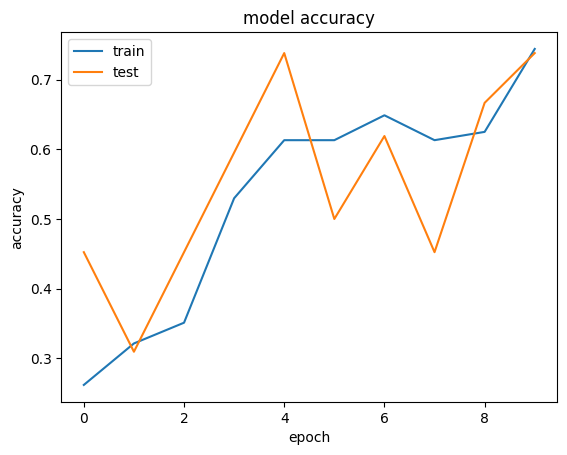

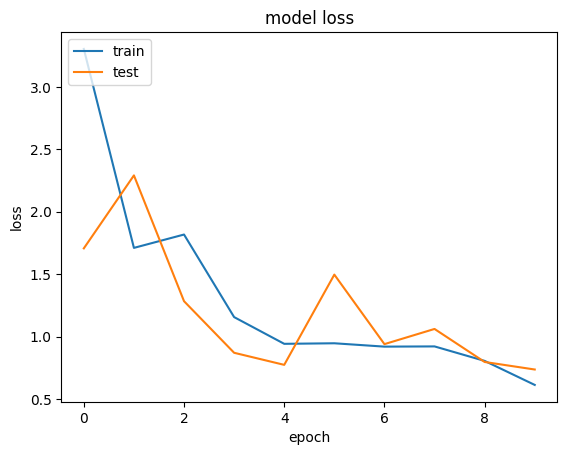

In [12]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [14]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

              precision    recall  f1-score   support

 Combination       0.57      0.44      0.50         9
         Dry       0.60      0.75      0.67        12
      Normal       0.78      0.88      0.82         8
        Oily       1.00      0.85      0.92        13

    accuracy                           0.74        42
   macro avg       0.74      0.73      0.73        42
weighted avg       0.75      0.74      0.74        42



<AxesSubplot:>

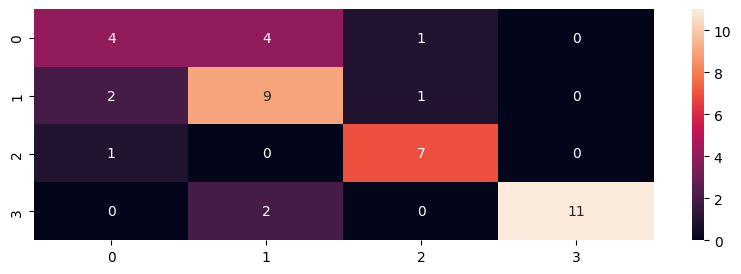

In [16]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [17]:
model.save("savemodel/VGGSKin.hp5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: savemodel/VGGSKin.hp5\assets


In [4]:
import os
import numpy as np
import os,cv2

In [5]:
for i in os.listdir("test/"):
    print(i)
    
    from tensorflow import keras
    model = keras.models.load_model('savemodel/VGGSKin.hp5')
    from keras.preprocessing import image
    image_size=224
    #img = cv2.imread(path1+"//"+i)
    path="test/"+i
    img = image.load_img(path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    print(type(x))
    img_4d=x.reshape(1,224,224,3)
    #img_4d=img_4d/255
    model = keras.models.load_model('savemodel/VGGSKin.hp5')
    predictions = model.predict(img_4d)
    print(predictions[0])
    new_pred=np.argmax(predictions[0])
    print(new_pred)
    
#     ['Combination', 'Dry', 'Normal', 'Oily']
    dict1={0:'Combination',1:'Dry',2:'Normal',3:'Oily'}
    list1=["Combination","Dry","Normal","Oily"]
    a=dict1[new_pred]
    
    print(str(a)+" Detected in Image")
    print("-----------------------------------------------")
    #break

augCombi_1_jpg.rf.70e46ad380508106c1daddbbdb562d5d.jpg
<class 'numpy.ndarray'>
[0.48831242 0.15055765 0.2882302  0.05849678 0.01440287]
0
Combination Detected in Image
-----------------------------------------------
augNormal_1-1_jpg.rf.34afcfa54082f3721335fd8dd00649a7.jpg
<class 'numpy.ndarray'>
[0.5143027  0.12758017 0.33046997 0.02274632 0.00490089]
0
Combination Detected in Image
-----------------------------------------------
augOily_1_jpg.rf.a51667981a69893656085d9e9525d4c1.jpg
<class 'numpy.ndarray'>
[0.26492402 0.5150617  0.01009116 0.20233314 0.00758997]
1
Dry Detected in Image
-----------------------------------------------
Dry1_jpg.rf.1b84e6fba00ccc002c0f4e1a7cb956f2.jpg
<class 'numpy.ndarray'>
[0.10765648 0.78661877 0.02420218 0.07364279 0.0078798 ]
1
Dry Detected in Image
-----------------------------------------------


In [ ]:
# pip install Pillow

In [ ]:
# from PIL import Image
# import os

# def resize_images(input_folder, output_folder, target_size):
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)

#     for filename in os.listdir(input_folder):
#         if filename.endswith(('.jpg', '.png', '.jpeg')):  # Add more supported extensions if needed
#             image_path = os.path.join(input_folder, filename)
#             img = Image.open(image_path)
            
#             # Resize the image while maintaining the aspect ratio
#             img.thumbnail(target_size)

#             # Add padding to make the image exactly 512x512
#             background = Image.new('RGB', target_size, (255, 255, 255))
#             background.paste(img, ((target_size[0] - img.size[0]) // 2, (target_size[1] - img.size[1]) // 2))

#             output_path = os.path.join(output_folder, filename)
#             background.save(output_path)

# input_folder = 'dataset/train/OTHERS'  # Replace with the path to your input folder
# output_folder = 'dataset/train/newfolder'  # Replace with the path to your output folder
# target_size = (512, 512)

# resize_images(input_folder, output_folder, target_size)
